# CIÊNCIA DE DADOS - DCA3501

UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE, NATAL/RN

DEPARTAMENTO DE ENGENHARIA DE COMPUTAÇÃO E AUTOMAÇÃO

(C) 2025-2026 CARLOS M D VIEGAS

https://github.com/cmdviegas

# Modelagem de Dados e Aprendizado de Máquina

Este notebook apresenta uma introdução aos conceitos de Modelagem de Dados e Aprendizado de Máquina - Aprendizado Supervisionado - `Árvores de Decisão` e `Random Forest`.

## 1. Árvores de Decisão

Uma árvore de decisão é um modelo que realiza previsões baseadas em uma sequência hierárquica de perguntas ou regras de decisão. Cada nó interno representa uma decisão baseada em um atributo, e cada nó folha representa o resultado final (classe ou valor previsto).

As árvores podem ser usadas para:
- Classificação → prever categorias (ex: "compra" ou "não compra")
- Regressão → prever valores contínuos (ex: preço de um imóvel)

### Construção da Árvore

O algoritmo de construção (como o CART – Classification and Regression Trees) segue o princípio de divisão recursiva:

1. Escolher o melhor atributo e ponto de corte que mais separa os dados.
2. Dividir o conjunto de dados em dois subconjuntos.
3. Repetir o processo para cada subconjunto até atingir um critério de parada.

O objetivo é formar nós homogêneos em relação à variável-alvo — ou seja, minimizar a impureza.

### Medidas de Impureza

1. Índice de Gini

    $$G = 1 - \sum_{i=1}^{C} p_i^2$$

    Onde:
    - $p_i$ é a proporção da classe *i* no nó.
    - Quanto menor o valor de G, mais puro é o nó.  
<br>
2. Entropia (Ganho de Informação)

    $$H = -\sum_{i=1}^{C} p_i \log_2(p_i)$$

    A entropia mede a desordem. Nós puros têm entropia zero.  
<br>
3. Erro Quadrático Médio (para regressão)

    $$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

    A árvore de regressão busca divisões que minimizem o MSE.

### Critério de Escolha da Divisão

Para cada atributo e ponto de corte possível, o algoritmo calcula:

$$G_{divisão} = \frac{n_{esq}}{n_{total}}G_{esq} + \frac{n_{dir}}{n_{total}}G_{dir}$$

E seleciona a divisão que minimiza o Gini ponderado (ou entropia/MSE, dependendo do tipo de problema).

Após cada tentativa de divisão (para um atributo e um ponto de corte específicos), o algoritmo calcula a pureza em cada lado:

$$
G_{esq} = 1 - \sum_{i=1}^{C} p_{i,esq}^2
\qquad\text{e}\qquad
G_{dir} = 1 - \sum_{i=1}^{C} p_{i,dir}^2
$$

onde $p_{i,esq}$ e $p_{i,dir}$ são as proporções da classe $i$ nos grupos da esquerda e da direita, respectivamente.  

A melhor divisão é aquela que minimiza $G_{divisão}$ (ou, de forma análoga, a entropia ponderada em classificação, ou o MSE ponderado em regressão).  

Esse procedimento é aplicado recursivamente em cada nó até um critério de parada ser atingido (por exemplo, `max_depth`, `min_samples_split`, `min_samples_leaf` ou nó puro).

#### Observações

- Para atributos numéricos, os pontos de corte candidatos são, tipicamente, os meios entre valores consecutivos ordenados do atributo.  
- Para atributos categóricos, bibliotecas como o `scikit-learn` usualmente exigem codificação (ex.: *one-hot*), e as divisões passam a ocorrer sobre variáveis binárias resultantes.  
- A escolha do critério (`gini` ou `entropy`, para classificação; `squared_error` ou `absolute_error` para regressão) é feita pelo usuário na criação do modelo e é aplicada em cada divisão.

#### Em resumo

1. Testa todos os pares (atributo, ponto de corte) possíveis;  
2. Calcula $G_{esq}$ e $G_{dir}$ (ou métrica equivalente);  
3. Combina por $G_{divisão}$ ponderado;  
4. Escolhe a divisão com maior ganho de pureza (ou maior redução de erro);  
5. Repete recursivamente até atingir o critério de parada.

### Exemplo "ilustrado" (passo a passo) para entendimento

O objetivo de uma árvore de decisão é dividir os dados em grupos cada vez mais homogêneos em relação à variável-alvo (classe ou valor). Vamos considerar o exemplo apresentado no slide de aula, em que queremos determinar se um cliente compra ou não um produto de acordo com sua idade.

Para isso, o algoritmo:
1. Percorre todos os atributos (ex.: `idade`, `renda`, etc.);
2. Testa possíveis pontos de corte em cada atributo;
3. Calcula uma métrica de impureza (Gini, Entropia ou MSE);
4. Escolhe o corte que maximiza a pureza dos grupos resultantes.

#### Determinando os possíveis pontos de corte

Vamos considerar os seguintes dados para entendimento do funcionamento do algoritmo:

| Idade | Compra |
|--------|--------|
| 22 | Não |
| 25 | Não |
| 32 | Sim |
| 35 | Sim |
| 40 | Sim |

Quando o atributo é numérico contínuo, os pontos de corte são definidos entre os valores consecutivos ordenados.

Então, o algoritmo:
1. Ordena as idades → `[22, 25, 32, 35, 40]`
2. Calcula os valores médios entre pares consecutivos:
   - (22 + 25) / 2 = 23.5
   - (25 + 32) / 2 = 28.5
   - (32 + 35) / 2 = 33.5
   - (35 + 40) / 2 = 37.5

Esses serão os pontos de corte candidatos.

#### Cálculo do Índice de Gini

Vamos calcular o Gini antes e depois de uma divisão hipotética em `idade < 30`.

1. Passo 1 – Gini do nó pai

    Temos 2 "Não" e 3 "Sim":

    - 2 "Não" $\rightarrow p(Não) = 2/5 = 0.4$
    - 3 "Sim" $\rightarrow p(Sim) = 3/5 = 0.6$

    $$
    G_{pai} = 1 - (0.4^2 + 0.6^2) = 0.48
    $$

2. Passo 2 – Divisão em idade < 30

    | Grupo | Idades | Classes | Total | "Não" | "Sim" |
    |--------|--------|----------|--------|-------|-------|
    | Esquerda | 22, 25 | Não, Não | 2 | 2 | 0 |
    | Direita | 32, 35, 40 | Sim, Sim, Sim | 3 | 0 | 3 |

    $$
    G_{esq} = 1 - (1^2 + 0^2) = 0
    $$
    $$
    G_{dir} = 1 - (0^2 + 1^2) = 0
    $$

3. Passo 3 – Gini ponderado da divisão

    $$
    G_{divisão} = \frac{n_{esq}}{n_{total}} G_{esq} + \frac{n_{dir}}{n_{total}} G_{dir}
    $$
    $$
    G_{divisão} = \frac{2}{5}(0) + \frac{3}{5}(0) = 0
    $$

4. Passo 4 – Ganho da divisão

    $$
    \text{Ganho} = G_{pai} - G_{divisão} = 0.48 - 0 = 0.48
    $$

    Esse é o melhor possível (ganho máximo), pois os dois grupos ficaram 100% puros.

#### Cálculo do Índice de Gini considerando outro ponto de corte (`idade < 35`)

| Grupo | Idades | Classes | Total | "Não" | "Sim" |
|--------|--------|----------|--------|-------|-------|
| Esquerda | 22, 25, 32 | Não, Não, Sim | 3 | 2 | 1 |
| Direita | 35, 40 | Sim, Sim | 2 | 0 | 2 |

$$
G_{esq} = 1 - (2/3)^2 - (1/3)^2 = 0.444
$$
$$
G_{dir} = 1 - (0^2 + 1^2) = 0
$$
$$
G_{divisão} = \frac{3}{5}(0.444) + \frac{2}{5}(0) = 0.266
$$
$$
\text{Ganho} = 0.48 - 0.266 = 0.214
$$

O ganho é menor, então esse corte é menos eficiente que `idade < 30`.
<br><br>
Para concluir, este cálculo foi demonstrado manualmente apenas para fins de compreensão.
Na prática, o algoritmo executa automaticamente esses mesmos cálculos — testando todos os pontos de corte candidatos de cada atributo, comparando os ganhos obtidos e selecionando aquele que maximiza a pureza dos grupos.

In [ ]:
# Importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Dataset
dados = pd.DataFrame({
    "idade": [22, 25, 32, 35, 40],
    "compra": ["Não", "Não", "Sim", "Sim", "Sim"]
})

print("Dataset de exemplo:\n")
print(dados, "\n")

# Converter a variável de saída (target) para numérica
# "Não" → 0 e "Sim" → 1
dados["compra_num"] = dados["compra"].map({"Não": 0, "Sim": 1})

# Separar preditores (X) e variável alvo (y)
X = dados[["idade"]]
y = dados["compra_num"]

# Criando e treinando o modelo de Árvore de Decisão
arvore = DecisionTreeClassifier(criterion="gini", max_depth=2, random_state=42)
# criterion="gini" → métrica usada para calcular impureza
# max_depth=2 → limitar profundidade para visualização simples
arvore.fit(X, y)

# Verificando o ponto de corte encontrado
print("Pontos de corte (thresholds) utilizados pela árvore:\n")
print(arvore.tree_.threshold, "\n")

print("O -2.0 no array de thresholds é apenas um marcador interno do scikit-learn indicando que aquele nó é folha (não realiza mais divisões)\n")

# Visualizando a árvore
plt.figure(figsize=(6, 4))
plot_tree(
    arvore,
    filled=True,
    feature_names=["idade"],
    class_names=["Não compra", "Compra"],
    rounded=True
)
plt.title("Árvore de Decisão - Exemplo (Idade x Compra)")
plt.show()

# Fazendo previsões
predicoes = pd.DataFrame({
    "idade": X["idade"],
    "compra_prevista": arvore.predict(X)
})
predicoes["compra_prevista"] = predicoes["compra_prevista"].map({0: "Não", 1: "Sim"})

print("\n\nPrevisões do modelo:\n")
print(predicoes, "\n")

# Interpretação dos resultados
print("""
Conclusão:
O ponto de corte escolhido automaticamente pelo algoritmo foi 28.5, pois é o valor que maximiza a pureza dos grupos formados.

Isso significa que:
- Se idade ≤ 28.5 → o modelo prevê 'Não compra'
- Se idade > 28.5 → o modelo prevê 'Compra'

Esse é exatamente o mesmo resultado obtido manualmente ao calcular o ganho de pureza máximo (G = 0.48).
""")


In [ ]:
# Será que o modelo faz novas previsões corretamente? Vamos testar!

# Novos clientes com idades variadas
novos_clientes = pd.DataFrame({"idade": [20, 27, 29, 33, 45]})

# Fazer previsões
novas_predicoes = arvore.predict(novos_clientes)
novos_clientes["compra_prevista"] = novas_predicoes
novos_clientes["compra_prevista"] = novos_clientes["compra_prevista"].map({0: "Não", 1: "Sim"})

print("Previsões para novos clientes:")
print(novos_clientes)


### Exemplo Prático

Adaptado de: https://elisaterumi.substack.com/p/arvore-de-decisao-como-tomar-decisoes

Imagine que temos um conjunto de frutas e queremos classificá-las automaticamente com base em três características:  

- Peso (em gramas)  
- Cor (amarela, vermelha ou verde)  
- Forma (redonda ou alongada)  

Nosso objetivo será treinar um modelo de aprendizado supervisionado que consiga identificar corretamente o tipo de fruta com base nesses dados, usando árvore de decisão.

Passos do Projeto
1. Dados: Criamos um pequeno conjunto de dados com características fictícias das frutas e seus rótulos correspondentes (Banana, Maçã, Melão ou Morango)  

2. Pré-processamento: Convertemos as informações categóricas, como cor e forma, para valores numéricos, utilizando técnicas como o Label Encoding. Isso é necessário porque os algoritmos de aprendizado de máquina funcionam melhor com dados numéricos  

3. Treinamento do modelo: Utilizamos a classe `DecisionTreeClassifier` para construir o modelo. Ele aprende as regras que associam os dados às classes de frutas  

4. Visualização da árvore: Geramos um gráfico da árvore de decisão para entender as decisões tomadas pelo modelo em cada etapa  

In [ ]:
# Importando as bibliotecas necessárias
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Gerando dados fictícios sobre frutas
# [Peso (em gramas), Cor (String), Forma (0=Redonda, 1=Alongada)]
X = np.array([[190, 'Amarela', 'Redonda'],  # Banana, Amarela, Redonda
              [200, 'Vermelha', 'Redonda'],  # Maçã, Vermelha, Redonda
              [220, 'Verde', 'Alongada'],  # Melão, Verde, Alongada
              [180, 'Amarela', 'Redonda'],  # Banana, Amarela, Redonda
              [30, 'Vermelha', 'Redonda'], # Morango, Vermelho, Redondo
              [210, 'Vermelha', 'Redonda'],  # Maçã, Vermelha, Redonda
              [200, 'Verde', 'Alongada'],  # Melão, Verde, Alongada
              [170, 'Amarela', 'Redonda'],  # Banana, Amarela, Redonda
              [210, 'Vermelha', 'Redonda'],  # Maçã, Vermelha, Redonda
              [290, 'Verde', 'Alongada'],    # Melão, Verde, Alongada
              [50, 'Vermelha', 'Redonda']]) # Morango, Vermelho, Redondo

# Rótulos (0=Banana, 1=Maçã, 2=Melão, 3=Morango)
y = np.array([0, 1, 2, 0, 3, 1, 2, 0, 1, 2, 3])

# Codificando as cores (Label Encoding)
label_encoder = LabelEncoder()
X[:, 1] = label_encoder.fit_transform(X[:, 1])  # Codificando a coluna de cores

# Codificando a forma como valores numéricos
X[:, 2] = np.where(X[:, 2] == 'Redonda', 0, 1)

# Convertendo os dados de X para tipo numérico
X = X.astype(float)

# Criando o classificador de árvore de decisão
clf = DecisionTreeClassifier()

# Treinando o modelo
clf.fit(X, y)

# Visualizando a árvore de decisão
plt.figure(figsize=(12, 4))
plot_tree(clf, filled=True, feature_names=["Peso", "Cor", "Forma"], class_names=["Banana", "Maçã", "Melão", "Morango"], rounded=True, impurity=False)
plt.show()

Interpretação:

Se percorrermos a árvore, poderemos entender como o modelo toma suas decisões ao classificar cada fruta. Cada nó da árvore representa uma pergunta baseada nas características (como "O peso é maior que 200 gramas?" ou "A cor é amarela?"), e cada ramo nos leva a um subgrupo de dados mais específico.

Ao seguirmos os ramos, chegamos às folhas, que representam as classes finais, como Banana, Maçã, Melão ou Morango. Essa estrutura hierárquica facilita a interpretação do modelo e nos ajuda a identificar as características mais relevantes para a classificação.

Por exemplo, se uma fruta pesa 190 gramas, é amarela e tem uma forma redonda, a árvore pode decidir que é uma Banana ao seguir o caminho correspondente. Esse processo é conhecido como "inferência", e a clareza com que as árvores de decisão representam essas regras é uma das razões pelas quais elas são amplamente utilizadas em problemas de classificação e regressão.

A árvore aprendeu a separar as frutas com base no peso, cor e forma.
Cada nó representa uma pergunta (ex.: Peso ≤ 185? Cor = Verde?).
As folhas finais indicam a fruta prevista.

Exemplo de leitura:
- Se Peso ≤ 185 e Cor = Amarela → Banana
- Se Peso > 185 e Cor = Vermelha → Maçã
- Se Peso > 185 e Cor = Verde e Forma = Alongada → Melão
- Se Peso baixo e Cor = Vermelha → Morango

In [ ]:
# Novos exemplos para prever (Peso, Cor, Forma)
# Formato: [Peso, Cor, Forma]
novas_frutas = pd.DataFrame([
    [185, "Amarela", "Redonda"],   # deve ser Banana
    [210, "Vermelha", "Redonda"],  # deve ser Maçã
    [260, "Verde", "Alongada"],    # deve ser Melão
    [45, "Vermelha", "Redonda"],   # deve ser Morango
    [190, "Verde", "Alongada"],    # provavelmente Melão
    [200, "Amarela", "Alongada"]   # algo próximo de Banana ou Melão
], columns=["Peso", "Cor", "Forma"])

print("Novas amostras para classificação:\n")
print(novas_frutas)

# Codificar as colunas categóricas
# Usamos o mesmo LabelEncoder treinado antes para 'Cor'
novas_frutas["Cor"] = label_encoder.transform(novas_frutas["Cor"])

# Codificando a Forma (0 = Redonda, 1 = Alongada)
novas_frutas["Forma"] = np.where(novas_frutas["Forma"] == "Redonda", 0, 1)

# Converter para numpy array numérico
X_novo = novas_frutas[["Peso", "Cor", "Forma"]].astype(float).to_numpy()

# Fazer previsões com o modelo treinado
predicoes = clf.predict(X_novo)

# Interpretar as previsões
# Mapeando os números das classes para nomes das frutas
nomes_frutas = np.array(["Banana", "Maçã", "Melão", "Morango"])
novas_frutas["Fruta Prevista"] = nomes_frutas[predicoes]

print("\nPrevisões do modelo:\n")
print(novas_frutas)

# Interpretação final
print("""
O modelo aplica automaticamente as regras aprendidas durante o treino.
Com base no peso, cor e forma, ele determina a classe mais provável.

Exemplo:
- Peso baixo e cor vermelha → Morango
- Peso alto e forma alongada → Melão
- Peso médio e cor amarela → Banana
- Peso médio e cor vermelha → Maçã
""")


## 2. Random Forest



A Random Forest (Floresta Aleatória) é um método de *ensemble learning* baseado em múltiplas Árvores de Decisão.

Cada árvore é treinada com:
- Um subconjunto aleatório dos dados (amostragem *com reposição*, ou seja, *bootstrap*);
- Um subconjunto aleatório de atributos em cada divisão.

Cada árvore aprende padrões ligeiramente diferentes e, ao final, as previsões são combinadas:  
- Regressão: faz-se a média das previsões;
- Classificação: faz-se uma votação da maioria.

Essa combinação reduz a variância do modelo, tornando-o mais estável e menos propenso a *overfitting*.

### Funcionamento

1. Sorteia uma amostra *bootstrap* do conjunto de treino (com reposição);
2. Treina uma Árvore de Decisão com essa amostra;
3. Em cada nó, escolhe um subconjunto aleatório de variáveis;
4. Repete o processo para várias árvores;
5. Combina as previsões (média ou voto da maioria).

### Representação matemática

Conjunto de dados original:
$$
D = \{(x_i, y_i)\}_{i=1}^{N}
$$

Onde:  
    $x_i$ = vetor de features do exemplo $i$  
    $y_i$ = rótulo/alvo do exemplo $i$  
    $N$ = número de exemplos

Cada árvore é treinada em uma amostra *bootstrap* $ D_b $, resultando em:
$$
h_b(x) = \text{árvore treinada no conjunto } D_b
$$

Predição final:
- Regressão: 
$$
\hat{y} = \frac{1}{B} \sum_{b=1}^{B} h_b(x)
$$

- Classificação: 
$$
\hat{y} = \operatorname{modo}\{h_1(x), h_2(x), \dots, h_B(x)\}
$$


### Exemplo "ilustrado" (passo a passo) para entendimento

A ideia aqui é mostrar, passo a passo, o que acontece "dentro" de uma Random Forest.

#### 1. Conjunto de dados

Imagine que queremos prever se uma pessoa vai comprar (1) ou não vai comprar (0) um produto.

Usaremos só 2 variáveis:

- `idade` (em anos)  
- `renda` (em milhares de R$)

O conjunto de treino é:

| Pessoa | idade | renda | compra (y) |
|--------|-------|-------|-----------|
| 1      | 22    | 2.0   | 0         |
| 2      | 25    | 2.5   | 0         |
| 3      | 47    | 5.0   | 1         |
| 4      | 52    | 6.0   | 1         |
| 5      | 46    | 4.5   | 1         |

Vamos chamar esse conjunto de dados de:

$$
D = \{(x_i, y_i)\}_{i=1}^{5}
$$

onde $x_i = (\text{idade}, \text{renda})$.


#### 2. Ideia da Random Forest

Em vez de treinar uma única árvore, a Random Forest:

1. Gera várias amostras aleatórias com reposição (bootstrap) do conjunto $D$;  
2. Para cada amostra, treina uma Árvore de Decisão;  
3. Para prever, cada árvore dá a sua opinião;  
4. A floresta faz uma votação da maioria (classificação) ou média (regressão).

Vamos mostrar isso com 3 árvores.

#### 2.1. O que é o bootstrap?

Para criar diversidade entre as árvores, a Random Forest usa o bootstrap:

- Temos N exemplos;  
- Queremos uma nova amostra também com N exemplos;  
- Sorteamos com reposição;  
- Alguns exemplos se repetem, outros não aparecem.

Cada árvore é treinada em uma versão ligeiramente diferente do conjunto original:

$$
D_b = \{(x_{i_1}, y_{i_1}), \dots, (x_{i_N}, y_{i_N})\}
$$

onde cada $i_j$ é sorteado aleatoriamente entre $\{1, ..., N\}$, com reposição.

Isso faz com que cada árvore aprenda coisas diferentes — essencial para o funcionamento da Random Forest.

Quando geramos uma amostra bootstrap com N sorteios com reposição a partir de um conjunto de N exemplos, cada exemplo tem probabilidade:

- De não ser escolhido:
  $$
  \left(1 - \frac{1}{N}\right)^N \approx e^{-1} \approx 0,368
  $$

- De aparecer pelo menos uma vez:
  $$
  1 - 0,368 = 0,632
  $$

Ou seja:

- Aproximadamente 36,8% dos exemplos ficam fora da amostra bootstrap (não são escolhidos);  
- Aproximadamente 63,2% aparecem pelo menos uma vez.

Esse valor surge naturalmente do processo de amostragem e é independente do conteúdo do conjunto de dados. Para $N$ grande, essa proporção se estabiliza.

#### 3. Gerando as amostras bootstrap $D_1, D_2, D_3$

Temos 5 pessoas no conjunto original.  
Para cada árvore, sorteamos 5 pessoas com reposição.

- Árvore 1 – amostra $D_1$

  Suponha que o sorteio (com reposição) deu:

  Pessoa: 2, 3, 3, 4, 5

  Então a amostra $D_1$ é:

  | Pessoa | idade | renda | compra |
  |--------|-------|-------|--------|
  | 2      | 25    | 2.5   | 0      |
  | 3      | 47    | 5.0   | 1      |
  | 3      | 47    | 5.0   | 1      |
  | 4      | 52    | 6.0   | 1      |
  | 5      | 46    | 4.5   | 1      |

  Note que a pessoa 3 aparece duas vezes (repetição é normal no bootstrap).

- Árvore 2 – amostra $D_2$

  Sorteio: 1, 2, 2, 5, 5

  | Pessoa | idade | renda | compra |
  |--------|-------|-------|--------|
  | 1      | 22    | 2.0   | 0      |
  | 2      | 25    | 2.5   | 0      |
  | 2      | 25    | 2.5   | 0      |
  | 5      | 46    | 4.5   | 1      |
  | 5      | 46    | 4.5   | 1      |

- Árvore 3 – amostra $D_3$

  Sorteio: 1, 3, 4, 4, 5

  | Pessoa | idade | renda | compra |
  |--------|-------|-------|--------|
  | 1      | 22    | 2.0   | 0      |
  | 3      | 47    | 5.0   | 1      |
  | 4      | 52    | 6.0   | 1      |
  | 4      | 52    | 6.0   | 1      |
  | 5      | 46    | 4.5   | 1      |

#### 4. O que cada árvore aprende?  

Na prática, o algoritmo de Árvore de Decisão escolhe cortes em `idade` e `renda` usando Gini/Entropia.

Aqui, para fins didáticos, vamos supor que, depois de treinar, ele encontrou regras simples assim:

- Árvore 1 – $h_1(x)$

  A amostra $D_1$ tem muitos compradores com idade acima de ~45.  
  Suponha que a árvore encontre a regra:

  > Se `idade > 40` → prediz compra = 1  
  > Caso contrário → compra = 0

  Escrevendo como função:

  $$
  h_1(x) =
  \begin{cases}
  0, & \text{se idade} \le 40 \\
  1, & \text{se idade} > 40
  \end{cases}
  $$

- Árvore 2 – $h_2(x)$

  Na amostra $D_2$, as pessoas com renda mais baixa tendem a não comprar.  
  Suponha que a árvore 2 aprenda:

  > Se `renda > 3.5` → compra = 1  
  > Caso contrário → compra = 0

  $$
  h_2(x) =
  \begin{cases}
  0, & \text{se renda} \le 3.5 \\
  1, & \text{se renda} > 3.5
  \end{cases}
  $$

- Árvore 3 – $h_3(x)$

  Na amostra $D_3$, também vemos claramente que quem tem idade alta compra.  
  Suponha que ela aprenda:

  > Se `idade > 45` → compra = 1  
  > Caso contrário → compra = 0

  $$
  h_3(x) =
  \begin{cases}
  0, & \text{se idade} \le 45 \\
  1, & \text{se idade} > 45
  \end{cases}
  $$

#### 5. Fazendo uma predição com a Floresta

Agora chega uma nova pessoa:

- idade = 44  
- renda = 4.0  

Vamos chamar esse vetor de entrada $x_{\text{novo}}$.

##### 5.1. O que cada árvore responde?

Usando as regras:

- Árvore 1 – $h_1$

  > Regra: se idade > 40 → 1  
  > Aqui: idade = 44 → > 40 →  
    $$
    h_1(x_{\text{novo}}) = 1
    $$

- Árvore 2 – $h_2$

  > Regra: se renda > 3.5 → 1  
  > Aqui: renda = 4.0 → > 3.5 →  
    $$
    h_2(x_{\text{novo}}) = 1
    $$

- Árvore 3 – $h_3$

  > Regra: se idade > 45 → 1  
  > Aqui: idade = 44 → não é > 45 →  
    $$
    h_3(x_{\text{novo}}) = 0
    $$

  Resumo:

  | Árvore | Predição |
  |--------|----------|
  | $h_1$ | 1 |
  | $h_2$ | 1 |
  | $h_3$ | 0 |

#### 6. Votação da Random Forest

Na Random Forest de classificação, a predição final é:

$$
\hat{y}(x_{\text{novo}}) = \operatorname{modo}\{h_1(x_{\text{novo}}), h_2(x_{\text{novo}}), h_3(x_{\text{novo}})\}
$$

Substituindo:

$$
\hat{y}(x_{\text{novo}}) = \operatorname{modo}\{1, 1, 0\} = 1
$$

Ou seja, a floresta decide que essa pessoa vai comprar.

Intuitivamente:

- 2 árvores acham que sim  
- 1 acha que não  
- A maioria vence

#### 7. Como isso seria para regressão?

Se fosse um problema de regressão, cada árvore daria um valor numérico (ex: preço da casa, nota, tempo etc.).

Exemplo: três árvores prevendo o preço (em milhares de R$):

$$
h_1(x) = 250,\quad h_2(x) = 270,\quad h_3(x) = 260
$$

A Random Forest faz a média:

$$
\hat{y}(x) = \frac{1}{3}(250 + 270 + 260) = 260
$$

Ou seja, a predição final da floresta para esse exemplo é 260 mil reais.

De forma geral, se tivermos \(B\) árvores em um problema de regressão, a Random Forest prevê:

$$
\hat{y}(x) = \frac{1}{B} \sum_{b=1}^{B} h_b(x)
$$

A média das predições individuais tende a reduzir a variância e produzir uma estimativa mais estável do que qualquer árvore isolada.

#### 8. Resumo

- Cada árvore é treinada com uma visão diferente dos dados (subconjuntos com reposição)  
- Cada uma aprende regras simples, mas com variação.  
- Sozinhas, elas podem errar bastante (alta variância).  
- Juntas, pela média/votação, a tendência é o erro se compensar.  

> A Random Forest funciona como um "comitê de especialistas": cada árvore dá sua opinião, e a floresta tira a conclusão final.


### Exemplo prático

Adaptado de: https://elisaterumi.substack.com/p/random-forest-como-melhorar-a-precisao

Neste exemplo, vamos usar o dataset Iris, um conjunto de dados clássico em aprendizado de máquina, utilizado para tarefas de classificação. Ele contém 150 amostras de flores da espécie Iris, com 4 características (comprimento e largura da sépala e pétala) para cada amostra, divididas em três classes: setosa, versicolor e virginica.

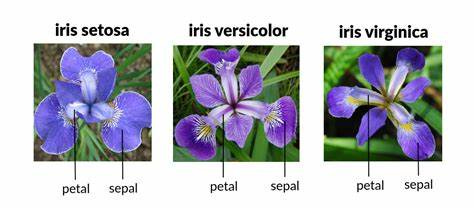

- Treinamento

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Carregar o dataset Iris
data = load_iris()
X = data.data
y = data.target

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 30% para teste

# Criar e treinar o modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões e avaliar o modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Acurácia do modelo: {accuracy:.2f}")


- Inferência

Agora, podemos fazer inferêcnia com o modelo treinado. Vamos supor que temos duas flores Iris no qual queremos descobrir a espécie. Extraímos o comprimento e largura da sépala e pétala e vamos enviar para o modelo.


Nosso modelo fez previsões para os dois novos exemplos e as classes previstas para esses exemplos são 0 e 1, que correspondem aos índices das classes no conjunto de dados, no caso *setosa* e *versicolor*.



In [ ]:
# Novos dados para fazer a inferência
novos_dados = [[5.1, 3.5, 1.4, 0.2],  # Exemplo 1
               [6.7, 3.1, 4.7, 1.5]]  # Exemplo 2

# Fazer a previsão
previsoes = model.predict(novos_dados)

# Exibir as previsões
print("Previsões para os novos dados:", previsoes)

- Visualizar a Importância das Features

Agora vamos ver quais características do conjunto de dados são mais importantes para o modelo.

Este gráfico mostra a importância relativa de cada feature no modelo. O eixo y contém os nomes das variáveis (features), e o eixo x mostra a importância de cada uma delas para as decisões do modelo.



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obter a importância das features
importancia = model.feature_importances_ # Obtém a importância de cada feature no modelo, um valor entre 0 e 1, onde valores mais altos indicam maior importância, e a soma de todas as importâncias é igual a 1

# Criar o gráfico de importância das features
features = data.feature_names # Nomes das features do dataset Iris
indices = np.argsort(importancia) # Índices que ordenam as importâncias

plt.figure(figsize=(8, 6))
plt.title("Importância das Features")
plt.barh(range(len(indices)), importancia[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Importância")
plt.show()

- Matriz de Confusão

A matriz de confusão ajuda a avaliar a performance do modelo, mostrando como ele classificou corretamente ou incorretamente as amostras de cada classe.

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Gerar a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Matriz de Confusão")
plt.xlabel("Predição")
plt.ylabel("Real")
plt.show()